# Covid-19 Stats
## Análise dos dados

### Imports

In [43]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Dados por regiões de saúde

In [21]:
dados_por_regiao_de_saude = pd.read_json('https://xx9p7hp1p7.execute-api.us-east-1.amazonaws.com/prod/PortalRegiaoSaude')
dados_por_regiao_de_saude.head()

,_id,nome,cod,casosAcumulado,obitosAcumulado,incidencia,incidenciaObito
0,São Paulo,São Paulo,35016,31873,2596,1190,96
1,1ª Região Fortaleza,1ª Região Fortaleza,23001,13777,1039,7285,421
2,Metropolitana I,Metropolitana I,33005,11264,1509,8857,823
3,"Manaus, Entorno e Alto Rio Negro","Manaus, Entorno e Alto Rio Negro",13001,9410,809,19855,1102
4,Recife,Recife,26010,8096,507,16564,1585


In [22]:
dados_por_regiao_de_saude.shape

(332, 7)

### Dados dos casos diários/semanais do Brasil

In [23]:
dados_brasil_json = requests.get('https://xx9p7hp1p7.execute-api.us-east-1.amazonaws.com/prod/PortalCasos').json()
dados_brasil_por_semana = dados_brasil_json['semana']
dados_brasil_por_dia = dados_brasil_json['dias']

In [24]:
dados_de_casos_diarios = pd.DataFrame.from_dict(dados_brasil_por_dia)
print(dados_de_casos_diarios.shape)
dados_de_casos_diarios.columns = ['Data', 'Casos Acumulados', 'Óbitos Acumulados', 'Casos Novos', 'Óbitos Novos']
dados_de_casos_diarios.head(-5)

(79, 5)


,Data,Casos Acumulados,Óbitos Acumulados,Casos Novos,Óbitos Novos
0,26/02,1,0,0,0
1,27/02,1,0,0,0
2,28/02,1,0,0,0
3,29/02,2,0,1,0
4,01/03,2,0,0,0
...,...,...,...,...,...
69,05/05,114715,7921,6935,600
70,06/05,125218,8536,10503,615
71,07/05,135106,9146,9888,610
72,08/05,145328,9897,10222,751


### Gráfico com dados dos casos no Brasil

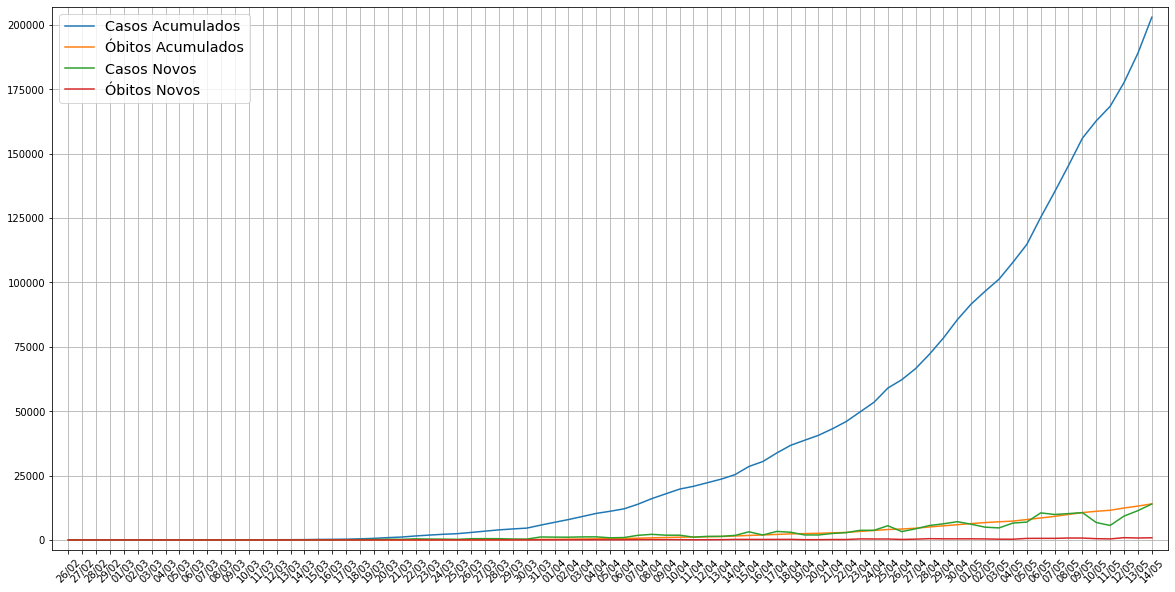

In [46]:
fig = plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
plt.plot('Data', 'Casos Acumulados', data=dados_de_casos_diarios, label='Casos Acumulados')
plt.plot('Data', 'Óbitos Acumulados', data=dados_de_casos_diarios, label='Óbitos Acumulados')
plt.plot('Data', 'Casos Novos', data=dados_de_casos_diarios, label='Casos Novos')
plt.plot('Data', 'Óbitos Novos', data=dados_de_casos_diarios, label='Óbitos Novos')
plt.grid()
plt.margins(0.015, 0.02)
plt.legend(fontsize='x-large')
plt.show()

### Dados dos casos diários/semanais por regiões

In [26]:
dados_regioes_json = requests.get('https://xx9p7hp1p7.execute-api.us-east-1.amazonaws.com/prod/PortalRegiaoUf').json()
# estados_sudeste = [estado for estado in dados_regioes_json['Sudeste']]
# estados_norte = [estado for estado in dados_regioes_json['Sudeste']]
# estados_nordeste = [estado for estado in dados_regioes_json['Nordeste']]
# estados_sul = [estado for estado in dados_regioes_json['Sul']]
# estados_centro_oeste = [estado for estado in dados_regioes_json['Centro-Oeste']]
regioes = ['Sudeste', 'Sudeste', 'Nordeste', 'Sul', 'Centro-Oeste', 'Norte']
print(regioes)

['Sudeste', 'Sudeste', 'Nordeste', 'Sul', 'Centro-Oeste', 'Norte']


In [27]:
estados = dict()
for regiao in regioes:
    estados[regiao] = [estado for estado in dados_regioes_json[regiao]]

estados

{'Sudeste': ['SP', 'RJ', 'ES', 'MG'],
 'Nordeste': ['CE', 'PE', 'MA', 'BA', 'PB', 'AL', 'RN', 'SE', 'PI'],
 'Sul': ['SC', 'RS', 'PR'],
 'Centro-Oeste': ['DF', 'GO', 'MT', 'MS'],
 'Norte': ['AM', 'PA', 'AP', 'AC', 'RO', 'RR', 'TO']}

In [28]:
dataframe_de_estados = dict()
for regiao in regioes:
    for estado in estados[regiao]:
        dataframe_de_estados[estado] = pd.DataFrame.from_dict(dados_regioes_json[regiao][estado]['dias'])
        dataframe_de_estados[estado].columns = ['Data', 'Casos Acumulados', 'Óbitos Acumulados']
        dataframe_de_estados[estado]['Casos Novos'] = dataframe_de_estados[estado]['Casos Acumulados'].diff().fillna(dataframe_de_estados[estado]['Casos Acumulados'])
        dataframe_de_estados[estado]['Óbitos Novos'] = dataframe_de_estados[estado]['Óbitos Acumulados'].diff().fillna(dataframe_de_estados[estado]['Óbitos Acumulados'])
        # dataframe_de_estados[estado]['Casos Novos'] = dataframe_de_estados[estado]['Casos Acumulados']

#### Exemplo de casos no estado Rio de Janeiro

In [29]:
dataframe_de_estados['RJ'].tail(10)

,Data,Casos Acumulados,Óbitos Acumulados,Casos Novos,Óbitos Novos
69,05/05,12391,1123,670.0,58.0
70,06/05,13295,1205,904.0,82.0
71,07/05,14156,1394,861.0,189.0
72,08/05,15741,1503,1585.0,109.0
73,09/05,16929,1653,1188.0,150.0
74,10/05,17062,1714,133.0,61.0
75,11/05,17939,1770,877.0,56.0
76,12/05,18486,1928,547.0,158.0
77,13/05,18728,2050,242.0,122.0
78,14/05,19467,2247,739.0,197.0


#### Número de casos novos no Rio De Janeiro

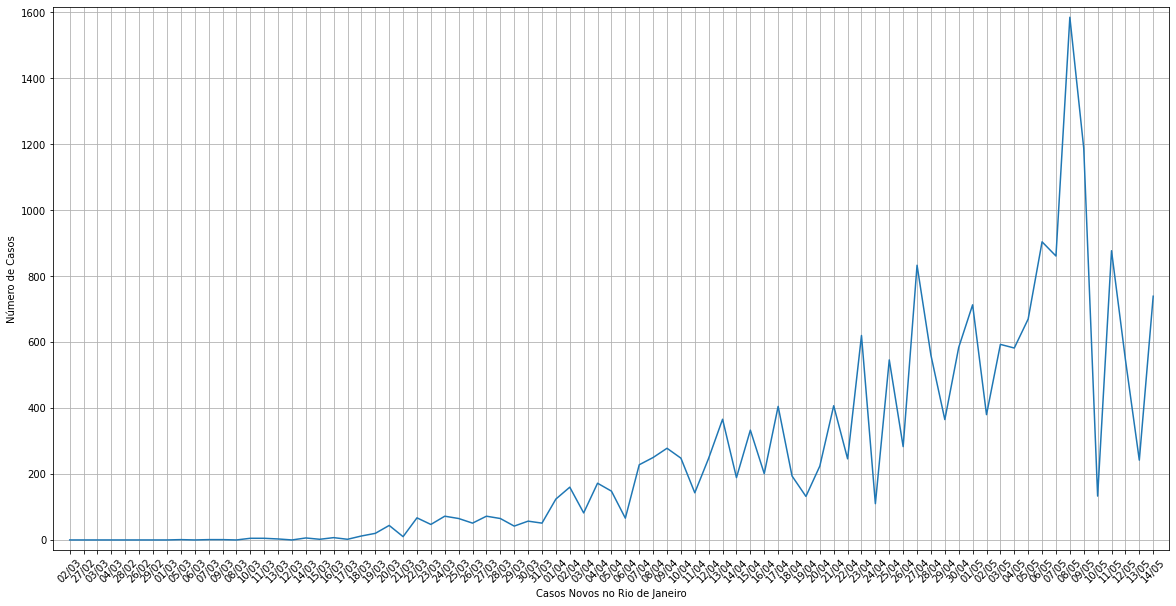

In [30]:

fig = plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
plt.grid()
plt.xlabel("Casos Novos no Rio de Janeiro")
plt.ylabel("Número de Casos")
plt.margins(0.015, 0.02)
plt.plot('Data', 'Casos Novos', data=dataframe_de_estados['RJ'])
plt.show()

#### Número de casos acumulados no Rio de Janeiro

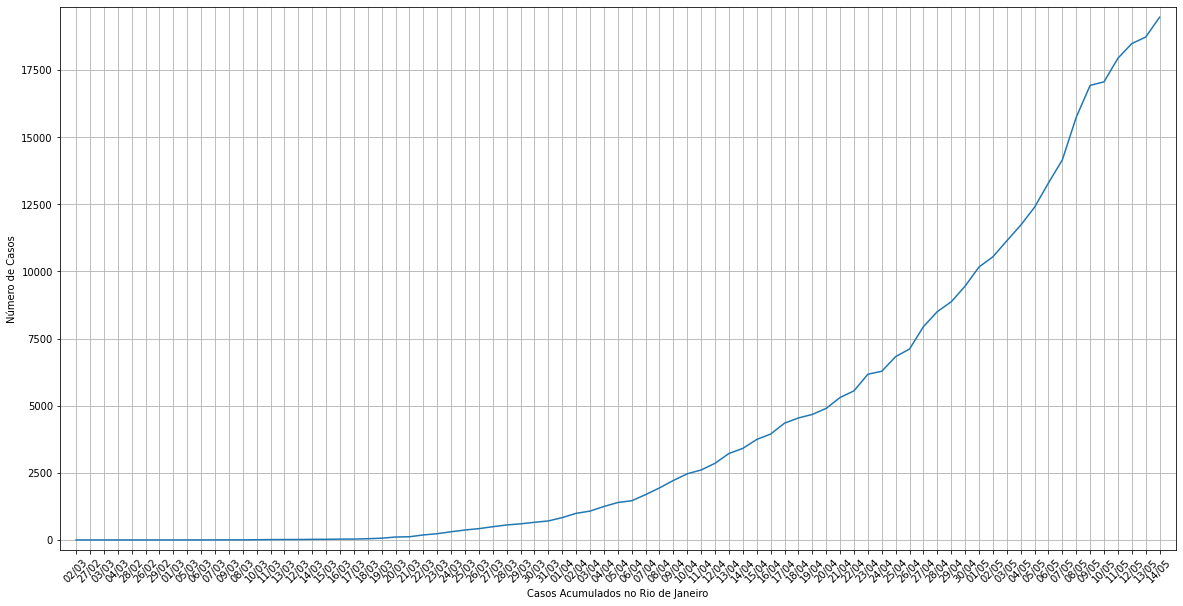

In [31]:
fig = plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
plt.grid()
plt.xlabel("Casos Acumulados no Rio de Janeiro")
plt.ylabel("Número de Casos")
plt.margins(0.015, 0.02)
plt.plot('Data', 'Casos Acumulados', data=dataframe_de_estados['RJ'])
plt.show()

### Gráfico com os casos acumulados de alguns estados

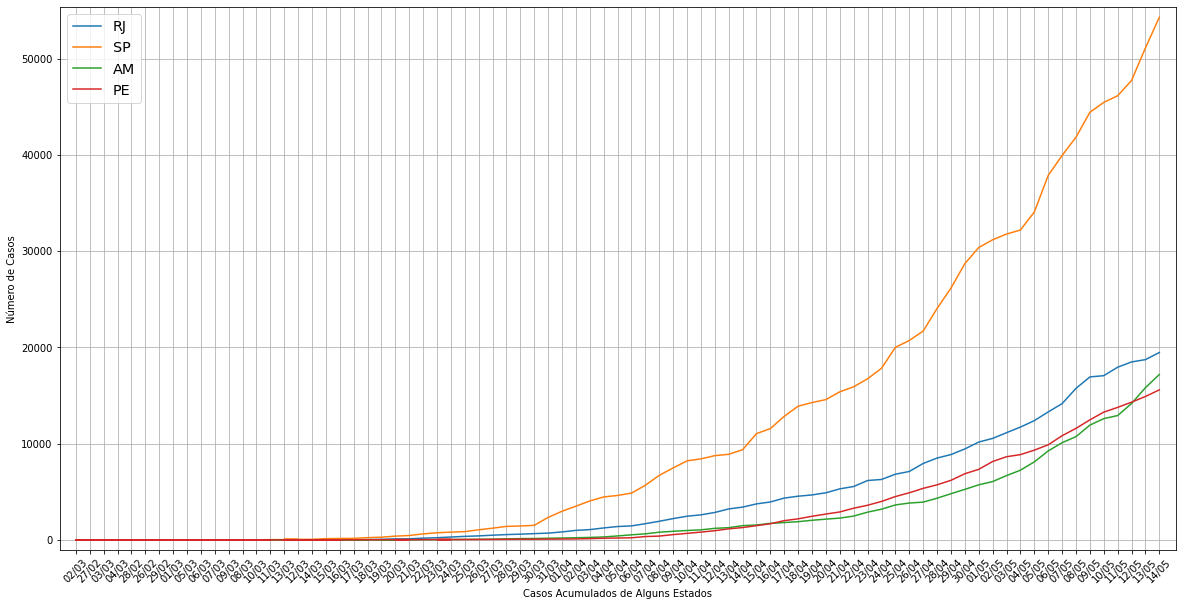

In [42]:
fig = plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
plt.grid()
plt.xlabel("Casos Acumulados de Alguns Estados")
plt.ylabel("Número de Casos")
plt.margins(0.015, 0.02)
plt.plot('Data', 'Casos Acumulados', data=dataframe_de_estados['RJ'], label='RJ')
plt.plot('Data', 'Casos Acumulados', data=dataframe_de_estados['SP'], label='SP')
plt.plot('Data', 'Casos Acumulados', data=dataframe_de_estados['AM'], label='AM')
plt.plot('Data', 'Casos Acumulados', data=dataframe_de_estados['PE'], label='PE')
plt.legend(fontsize='x-large')
plt.show()